In [2]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2

plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

# If you're trying to run that on Colab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/t
from helpers import plot
orig_img = Image.open('house_num.jpg')

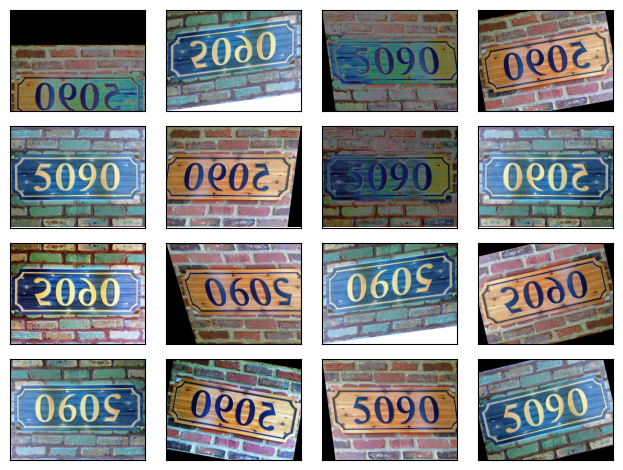

In [31]:
transform_train = v2.Compose([
    v2.ToImage(),
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
    v2.ToDtype(torch.float32, scale=True),
    v2.GaussianNoise(sigma=0.10),
    v2.AutoAugment(v2.AutoAugmentPolicy.SVHN),
    # v2.ColorJitter(),
    # v2.RandomGrayscale(),
    #v2.Lambda(scale),
])
# augmenter = v2.AutoAugment(policy)
imgs = [
    [transform_train(orig_img) for _ in range(4)]
    for _ in range(4)
]
plot(imgs)


In [ ]:
policies = [v2.AutoAugmentPolicy.SVHN]
augmenters = [v2.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(8)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
w = 16
plot([[orig_img] + row for row in imgs], figsize=(len(imgs) * w, w))
